In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline
from warnings import filterwarnings
filterwarnings('ignore')
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, RepeatedStratifiedKFold
from sklearn.preprocessing import OneHotEncoder,PowerTransformer, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle


# Import cleaned dataset

In [2]:
df = pd.read_csv('Algerian_forest_fires_dataset_CLEANEDandEDAandoutlierremoved.csv')

# Data Preprocessing for Classification

In [3]:
X = df.drop(['Classes'],axis=1)
y= df['Classes']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=0)
X_train.shape, X_test.shape

((183, 11), (61, 11))

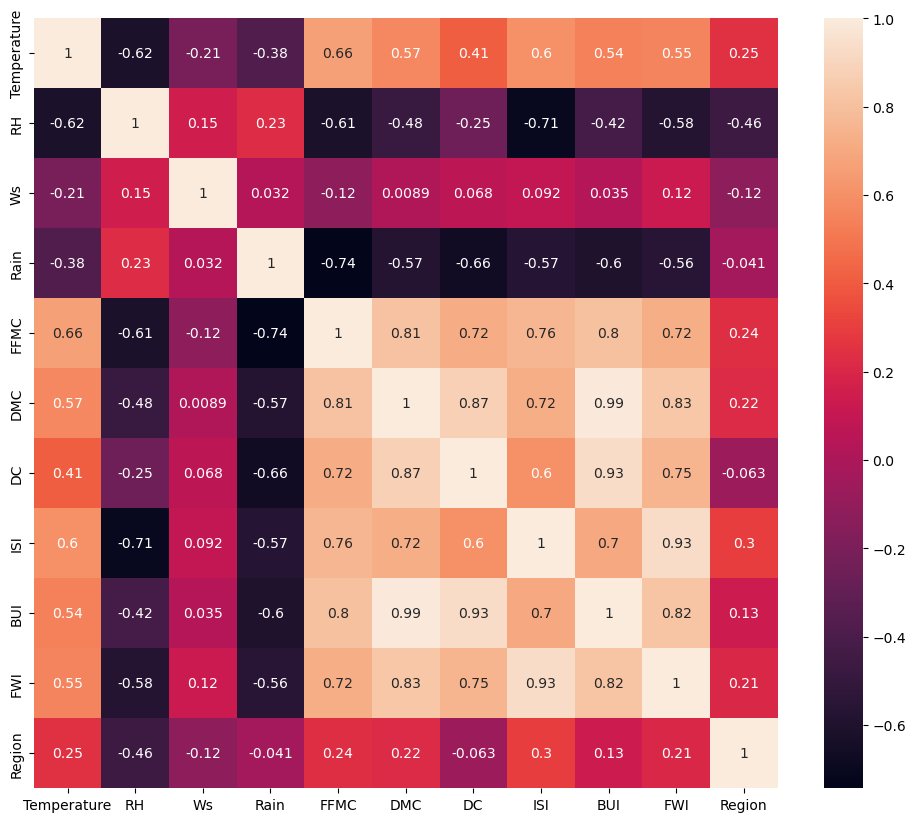

In [5]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True)
plt.show()

In [6]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [7]:
corr_features = correlation(X_train, 0.95)
corr_features

{'BUI'}

In [8]:
X_train.drop(corr_features,axis=1, inplace=True)
X_test.drop(corr_features,axis=1, inplace=True)
X_train.shape, X_test.shape

((183, 10), (61, 10))

In [9]:
X_train.to_csv('Algerian_forest_fires_batchC.csv', index=False)

In [10]:
def scaler_standard(X_train, X_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    return X_train_scaled, X_test_scaled

In [11]:
X_train_scaled, X_test_scaled = scaler_standard(X_train, X_test)

# Logistic Regression

In [12]:
# Import Logistic Regression to Train from SKlearn
loreg = LogisticRegression(max_iter=200)
loreg.fit(X_train_scaled,y_train)
loreg_pred = loreg.predict(X_test_scaled)
score = accuracy_score(y_test,loreg_pred)
cr = classification_report(y_test,loreg_pred)

print("Logistic Regression")
print ("Accuracy Score value: {:.4f}".format(score))
print (cr)

Logistic Regression
Accuracy Score value: 0.9016
              precision    recall  f1-score   support

           0       0.87      0.93      0.90        28
           1       0.94      0.88      0.91        33

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



|**Metrics**	| **Definition**                                                                                    |
|:-------------:|:-------------------------------------------------------------------------------------------------:|
| Precision	    | Precision is defined as the ratio of true positives to the sum of true and false positives.       |
| Recall        |Recall is defined as the ratio of true positives to the sum of true positives and false negatives. |
| F1 Score  	| The F1 is the weighted harmonic mean of precision and recall. The closer the value of the F1 score| 
|               |   is to 1.0, the better the expected performance of the model is.                                 |

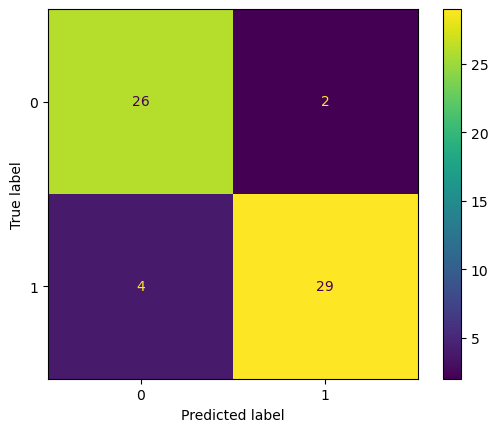

In [13]:
loreg_cm = ConfusionMatrixDisplay.from_estimator(loreg, X_test_scaled, y_test)

# Decision Tree

In [14]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train_scaled,y_train)
dtc_pred = dtc.predict(X_test_scaled)
score = accuracy_score(y_test,dtc_pred)
cr = classification_report(y_test,dtc_pred)

print("Decision Tree")
print ("Accuracy Score value: {:.4f}".format(score))
print (cr)

Decision Tree
Accuracy Score value: 0.9672
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        28
           1       0.97      0.97      0.97        33

    accuracy                           0.97        61
   macro avg       0.97      0.97      0.97        61
weighted avg       0.97      0.97      0.97        61



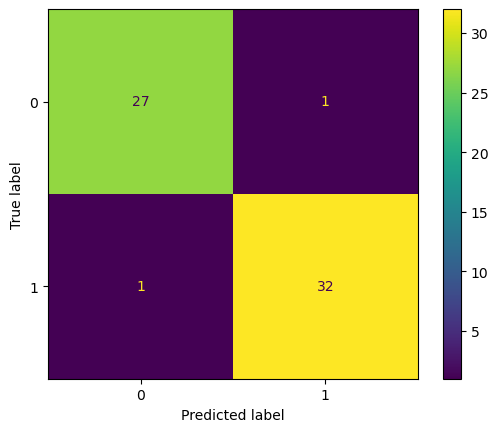

In [15]:
#Confusion matrix
dt_cm = ConfusionMatrixDisplay.from_estimator(dtc, X_test_scaled, y_test)

In [16]:
rfc = RandomForestClassifier()
rfc.fit(X_train_scaled,y_train)
rfc_pred = rfc.predict(X_test_scaled)
score = accuracy_score(y_test,rfc_pred)
cr = classification_report(y_test,rfc_pred)

print("Random Forest")
print ("Accuracy Score value: {:.4f}".format(score))
print (cr)

Random Forest
Accuracy Score value: 0.9672
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        28
           1       1.00      0.94      0.97        33

    accuracy                           0.97        61
   macro avg       0.97      0.97      0.97        61
weighted avg       0.97      0.97      0.97        61



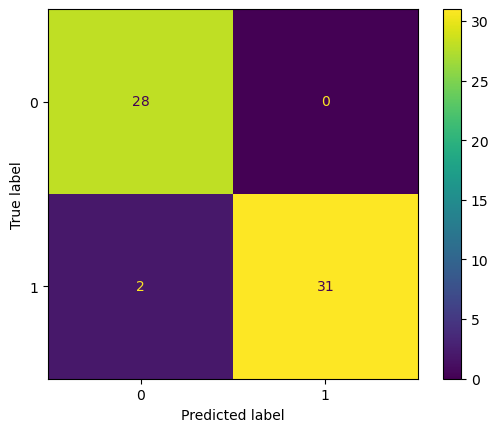

In [17]:
rf_cm = ConfusionMatrixDisplay.from_estimator(rfc, X_test_scaled, y_test)

In [18]:
# KNeighborsClassifier to Train from SKlearn
knnc = RandomForestClassifier()
knnc.fit(X_train_scaled,y_train)
knn_pred = knnc.predict(X_test_scaled)
score = accuracy_score(y_test,knn_pred)
cr = classification_report(y_test,knn_pred)

print("KNeighbors Classifier")
print ("Accuracy Score value: {:.4f}".format(score))
print (cr)

KNeighbors Classifier
Accuracy Score value: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        33

    accuracy                           1.00        61
   macro avg       1.00      1.00      1.00        61
weighted avg       1.00      1.00      1.00        61



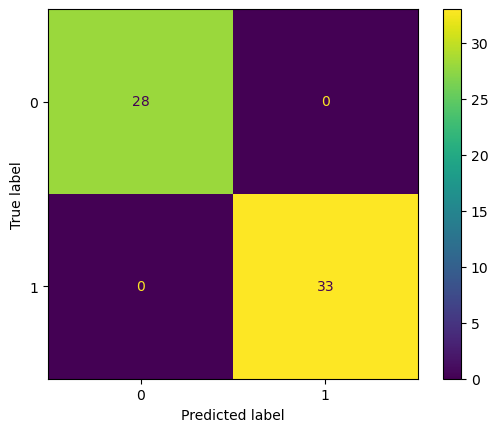

In [19]:
knn_cm = ConfusionMatrixDisplay.from_estimator(knnc, X_test_scaled, y_test)

# XGboost Model

In [20]:
# Import XGBClassifier to Train from SKlearn
xgb = XGBClassifier()
xgb.fit(X_train_scaled,y_train)
xgb_pred = xgb.predict(X_test_scaled)
score = accuracy_score(y_test, xgb_pred)
cr = classification_report(y_test, xgb_pred)

print("XGboost Classifier")
print ("Accuracy Score value: {:.4f}".format(score))
print (cr)

XGboost Classifier
Accuracy Score value: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        33

    accuracy                           1.00        61
   macro avg       1.00      1.00      1.00        61
weighted avg       1.00      1.00      1.00        61



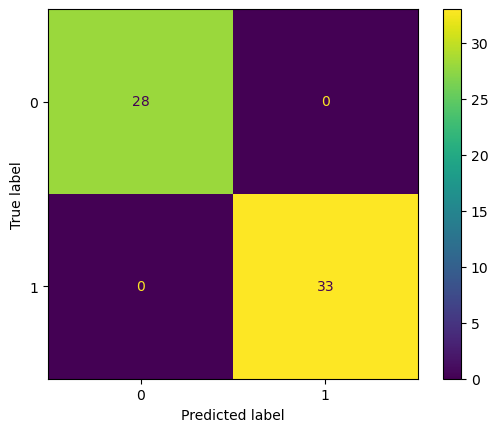

In [21]:
xgb_cm = ConfusionMatrixDisplay.from_estimator(xgb, X_test_scaled, y_test)

# Models Accuracy score



|              **Models**||**Accuracy score**|
|:------------------------------:||:---------------:|
|XGboost classifier              ||   100.00 %       |
|   Decision Tree Classifier     || 96.72 %         |
|Logistic Regression Accurracy   ||90.16 %|
|KNeighbors Classifier           ||100.00 %|
|Random Forest Classifier        ||96.72 %|	
	
	
	
	

# HyperParameter Tuning

# XGboost classifier Tuning

In [22]:
params={
 "learning_rate"    : (np.linspace(0,10, 100)) ,
 "max_depth"        : (np.linspace(1,50, 25,dtype=int)),
 "min_child_weight" : [1, 3, 5, 7],
 "gamma"            : [0.0, 0.1, 0.2 , 0.3, 0.4],
 "colsample_bytree" : [0.3, 0.4, 0.5 , 0.7]}
Random_xgb = RandomizedSearchCV(xgb, params, cv = 10,n_jobs = -1)
Random_xgb.fit(X_train_scaled, y_train).best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.3, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=8.383838383838384,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=17, max_leaves=None,
              min_child_weight=7, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [23]:
best_xgb = Random_xgb.best_estimator_
best_xgb.score(X_test_scaled,y_test)
bestxgb_pred = best_xgb.predict(X_test_scaled)
score = accuracy_score(y_test, bestxgb_pred)
cr = classification_report(y_test,bestxgb_pred)
print("FINAL XGB")
print ("Accuracy Score value: {:.4f}".format(score))
print (cr)

FINAL XGB
Accuracy Score value: 0.9672
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        28
           1       0.94      1.00      0.97        33

    accuracy                           0.97        61
   macro avg       0.97      0.96      0.97        61
weighted avg       0.97      0.97      0.97        61



# Random Forest classifier Tuning

In [24]:
params = {
    "n_estimators" : [90,100,115,130],
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,20,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'max_features' : ['auto','log2']
}
random_rf = RandomizedSearchCV(rfc, params, cv = 10,n_jobs = -1)
random_rf.fit(X_train_scaled, y_train).best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=9, max_features='log2',
                       min_samples_leaf=5, min_samples_split=8,
                       n_estimators=130)

In [25]:
best_rf = random_rf.best_estimator_
best_rf.score(X_test_scaled,y_test)
bestrf_pred = best_rf.predict(X_test_scaled)
score = accuracy_score(y_test, bestrf_pred)
cr = classification_report(y_test,bestrf_pred)
print("FINAL Random Forest")
print ("Accuracy Score value: {:.4f}".format(score))
print (cr)

FINAL Random Forest
Accuracy Score value: 0.9836
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        28
           1       1.00      0.97      0.98        33

    accuracy                           0.98        61
   macro avg       0.98      0.98      0.98        61
weighted avg       0.98      0.98      0.98        61



# KNN Tuning

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
seed = 42

# Define the KNN model
knn = KNeighborsClassifier()

# Define the hyperparameter search space
param_grid = {
    'n_neighbors': range(1, 30, 2),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan','minkowski'],
    'leaf_size': range(1,50,5)
}

cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = seed )

# Perform grid search cross-validation
grid_search = GridSearchCV(estimator= knn, param_grid = param_grid, n_jobs = 1, cv=cv, scoring = "accuracy", error_score = 0)
grid_results = grid_search.fit(X_train, y_train)


final_model = knn.set_params(**grid_results.best_params_)
final_model.fit(X_train, y_train)

y_pred = final_model.predict(X_test)


print(classification_report(y_test, y_pred) )
print(confusion_matrix(y_test, y_pred))
print(grid_results.best_params_)


              precision    recall  f1-score   support

           0       0.90      0.96      0.93        28
           1       0.97      0.91      0.94        33

    accuracy                           0.93        61
   macro avg       0.93      0.94      0.93        61
weighted avg       0.94      0.93      0.93        61

[[27  1]
 [ 3 30]]
{'leaf_size': 1, 'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}


# Applying Stratified Kfold Cross-Validation to know the exact Mean CV Accuracy Score for all models

In [27]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
skfold = StratifiedKFold(n_splits= 10,shuffle= True,random_state= 36)

In [28]:
cv_xgb= cross_val_score(best_xgb,X,y,cv=skfold,scoring='accuracy').mean()
print('CV Score XGB Tuned {:.4f}'.format(cv_xgb))

CV Score XGB Tuned 0.6885


In [29]:
cv_rf=cross_val_score(rfc,X,y,cv=skfold,scoring="accuracy").mean()
print('CV Score Random Forest {:.4f}'.format(cv_rf))

CV Score Random Forest 0.9753


In [30]:
cv_lg=cross_val_score(loreg,X,y,cv=skfold,scoring="accuracy").mean()
print('CV Score Logistic Regression {:.4f}'.format(cv_lg))

CV Score Logistic Regression 0.9752


In [31]:
cv_dt =cross_val_score(dtc,X,y,cv= skfold,scoring="accuracy").mean()
print('CV Score Decision Tree {:.4f}'.format(cv_dt))

CV Score Decision Tree 0.9793


In [32]:
cv_knn =cross_val_score(knnc,X,y,cv=skfold,scoring="accuracy").mean()
print('CV Score KNN Classifier {:.4f}'.format(cv_knn))

CV Score KNN Classifier 0.9752


# CV Score score Results Summary


|              **Models**||**Accuracy score**|
|:------------------------------:||:---------------:|
|XGboost classifier              ||   92.53 %       |
|   Decision Tree Classifier     || 96.68 %         |
|Logistic Regression Accurracy   ||97.52 %|
|KNeighbors Classifier           ||97.53 %|
|Random Forest Classifier        ||97.52 %|	

In [33]:
import pickle 
pickle.dump(final_model, open('C_model.pkl','wb'))

In [34]:
#testing pickle file 

test_pickle = pickle.load(open('C_model.pkl','rb'))
bestknn_pred = test_pickle.predict(X_test)
score = accuracy_score(y_test, bestknn_pred)
cr = classification_report(y_test,bestknn_pred)
print("FINAL KNN")
print ("Accuracy Score value: {:.4f}".format(score))
print (cr)

FINAL KNN
Accuracy Score value: 0.9344
              precision    recall  f1-score   support

           0       0.90      0.96      0.93        28
           1       0.97      0.91      0.94        33

    accuracy                           0.93        61
   macro avg       0.93      0.94      0.93        61
weighted avg       0.94      0.93      0.93        61



In [35]:
#testing of pickle file with single data
dict_test = {"Temperature": 29, 
"RH":57,
"Ws" :18,
"Rain":0,
"FFMC" :65.7,
"DMC" :3.4,
"DC" :7.6,
"ISI" :1.3,
"FWI" :0.5,
"Region" :1}

In [36]:
apps= [list(dict_test.values())]
a = test_pickle.predict(apps)
a[0]

0

In [37]:
dict_test_1 = {"Temperature": 33, 
"RH":54,
"Ws" :13,
"Rain":0,
"FFMC" :88.2,
"DMC" :9.9,
"DC" :30.5,
"ISI" :6.4,
"FWI" :7.2,
"Region" :1}

In [38]:
apps= [list(dict_test_1.values())]
a = test_pickle.predict(apps)
a[0]

1

# Comparing predicted Y data with actual Y_test

In [39]:

Actual_predicted = pd.DataFrame({'Actual Revenue': y_test, 'Predicted Revenue': bestknn_pred}) 
Actual_predicted

,Actual Revenue,Predicted Revenue
64,1,0
63,0,0
55,1,1
111,1,1
225,1,1
...,...,...
116,0,0
33,0,0
122,0,0
161,0,0
